# **Exploratory Data Analysis**

**Data Cleaning**,  **Correlation Analysis** , **Checking Imbalance Data in Target** We will go through with every single column seperately to understand its nature and its value and at the end of this file we will create two new dataframe by **Selecting Feautures for Model Training** and returning the copy of the actual dataframe

In [ ]:
# Import necessary libraries

import pandas as pd   # For Data Manipulation
import numpy as np    # For Data Manipulation
import matplotlib.pyplot as plt   # For visualization
import seaborn as sns   # For visualization
import plotly.express as px    # For visualization
import warnings   # To ignore warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
ddf=  pd.read_csv('/content/Marketing_subscription_prediction_latest_edited data.csv',)
print("Columns in DataFrame:", ddf.shape[1], "\nRows in DataFrame:", ddf.shape[0])

Columns in DataFrame: 21 
Rows in DataFrame: 41199


In [ ]:
ddf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210.0,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,138.0,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,339.0,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,185.0,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137.0,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
ddf.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41197.000000,41199,41199,41199,41199,41199,41199,41193,41199,41199,41192.000000,41199.000000,41199.000000,41199.000000,41199,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000,41199.000000
unique,NaN,12,4,9,3,3,5,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10425,24935,12170,32595,21580,33951,26146,13775,8626,NaN,NaN,NaN,NaN,35573,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.023812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.274762,2.567514,962.485206,0.172941,NaN,0.081900,93.575650,-40.502002,3.621336,5167.036455,0.112648
std,10.434966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.270089,2.769719,186.886905,0.494859,NaN,1.570971,0.578845,4.628524,1.734431,72.249592,0.316166
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [ ]:
ddf_copy= ddf.copy()

In [ ]:
# prompt: drop duplicate and check

# Check for duplicate rows
print(f"Duplicate rows before dropping: {ddf_copy.duplicated().sum()}")

# Drop duplicate rows
ddf_copy.drop_duplicates(inplace=True)

# Check for duplicate rows after dropping
print(f"Duplicate rows after dropping: {ddf_copy.duplicated().sum()}")


Duplicate rows before dropping: 12
Duplicate rows after dropping: 0


# **AGE COLUMN**

**Discription:** Age Column determines age of the client

*Null values , Skewness, Outliers and DataTypes check*

In [ ]:
ddf_copy= ddf.copy()
Age= ddf_copy[['age']]

def more_stats(data):
  """
  check null values in a given column ,  data type and outliers of given column
  """
  print("Some Stats Info".center(100,"-"))
  # Directly assign the result of isnull().sum() to null
  null = data.isnull().sum()
  datatype= data.dtypes
  Q1= data.quantile(0.25) # Extract the numeric value from the Series
  Q3= data.quantile(0.75) # Extract the numeric value from the Series
  IQR= Q3-Q1
  # Use data in both comparisons and extract numeric values from Q1, Q3 and IQR
  outliers = len(data[~((data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 * IQR)).all(axis=1)])
  skew = data.skew()
  # Extract the numeric value from the skew Series
  skew_value = skew.iloc[0] if not skew.empty else 0
  if skew_value>0.5:
    print(f"The data is Right Skewness")
  elif skew_value<-0.5:
    print(f"The data is  Left Skewness")
  elif skew_value==0:
    print(f"The data is perfectly Skewed")
  else:
    print(f"The data is Roughly Skewed")
  print(f"Data Types of the data is {datatype}")
  print(f"Null Values in the data --> {null}")
  print(f"Outliers in the data --> {outliers}")
more_stats(Age)

------------------------------------------Some Stats Info-------------------------------------------
The data is Right Skewness
Data Types of the data is age    float64
dtype: object
Null Values in the data --> age    2
dtype: int64
Outliers in the data --> 476


This function draw a scatter plot and a Histomgrame and only accept dataframe with single column

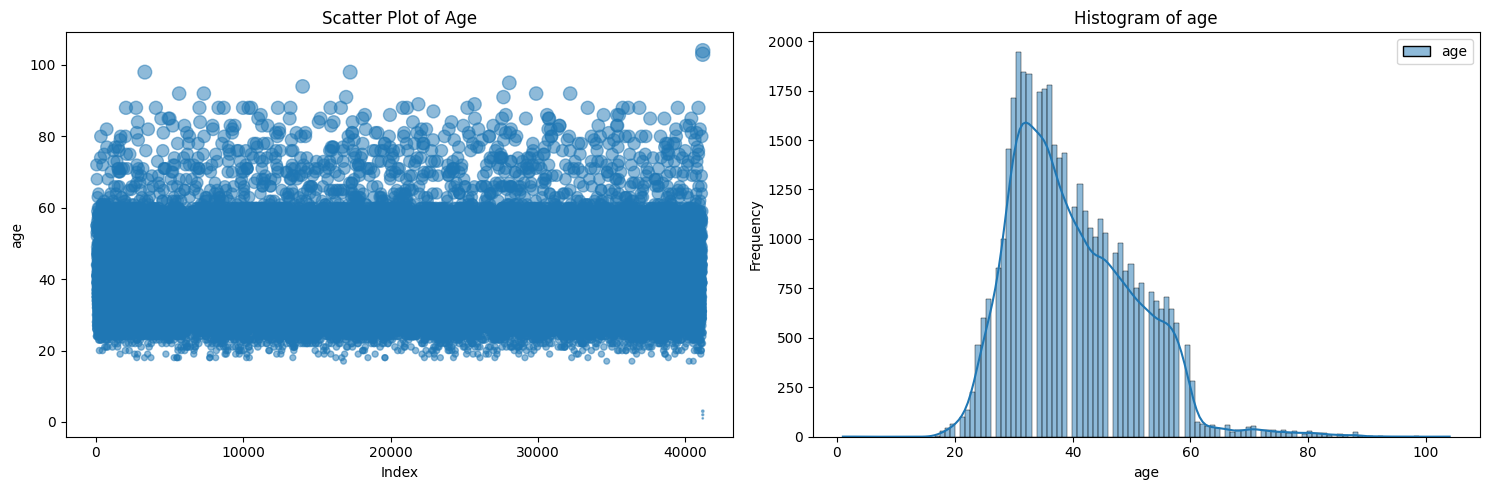

In [ ]:
def plot_scatter_distribution(age_data):
  """
  This function creates a scatter plot and histogram with KDE for the given age data.

  Args:
      age_data (pandas.Series): A pandas Series containing the age data.
  """
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))

  # Scatter plot
  axs[0].scatter(age_data.index, age_data, s=age_data, alpha=0.5)
  axs[0].set_xlabel('Index')
  axs[0].set_ylabel(age_data.columns[0])
  axs[0].set_title('Scatter Plot of Age')

  # Histogram with KDE
  sns.histplot(age_data, kde=True, ax=axs[1])
  axs[1].set_xlabel(age_data.columns[0])
  axs[1].set_ylabel('Frequency')
  axs[1].set_title(f'Histogram of {age_data.columns[0]}')

  plt.tight_layout()
  plt.show()


plot_scatter_distribution(Age)

*Check the Distribution and Outliers again*

In [ ]:
# Age_= np.log(Age)
# more_stats(Age_)

In [ ]:
# Replace Age column with age transformation value
# ddf_copy['age']= np.log(ddf_copy['age'])

In [ ]:


ddf_copy['age'] = ddf_copy['age'].fillna(ddf_copy['age'].mean())


#  **DURATION Column**

**Discription:** Duration of call while contacting to client

In [ ]:


# ddf_copy['duration'].fillna('unknown', inplace=True)


In [ ]:


ddf_copy.dropna(subset=['duration'], inplace=True)


In [ ]:
ddf_copy["duration"].isnull().sum()

0

In [ ]:

# Create bins for duration column
duration_bins = pd.cut(ddf_copy['duration'], bins=[-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, np.inf],
                       labels=['0-100', '101-200', '201-300', '301-400', '401-500', '501-600',
                               '601-700', '701-800', '801-900', '901-1000', '1000+'])

# Add the binned column to the DataFrame
ddf_copy['duration_bins'] = duration_bins
ddf_copy[ddf_copy["duration_bins"].isna()]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,duration_bins


In [ ]:
# ddf_copy['duration_bins'] = ddf_copy['duration_bins'].cat.add_categories('unknown')
# ddf_copy['duration'].fillna('unknown', inplace=True)
# ddf_copy['duration_bins'].fillna('unknown', inplace=True)


In [ ]:
ddf_copy[ddf_copy["duration_bins"].isna()]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,duration_bins


In [ ]:
fig= px.bar(ddf_copy, x=ddf_copy['duration_bins'].value_counts().index,
       y=ddf_copy['duration_bins'].value_counts().values,title= "Duration Value Counts" )
fig.update_xaxes(title_text="Duration")  # Update x-axis title
fig.update_yaxes(title_text="Count")   # Update y-axis title
fig.show()

In [ ]:
ddf_copy['duration_bins'].isnull().sum()

0

# **CAMPAIGN Coulmn**

**Discription:** Number of contacts performed during this marketing campaign for the same client

In [ ]:
campaing= ddf_copy[["campaign"]]
more_stats(campaing)

------------------------------------------Some Stats Info-------------------------------------------
The data is Right Skewness
Data Types of the data is campaign    int64
dtype: object
Null Values in the data --> campaign    0
dtype: int64
Outliers in the data --> 2406


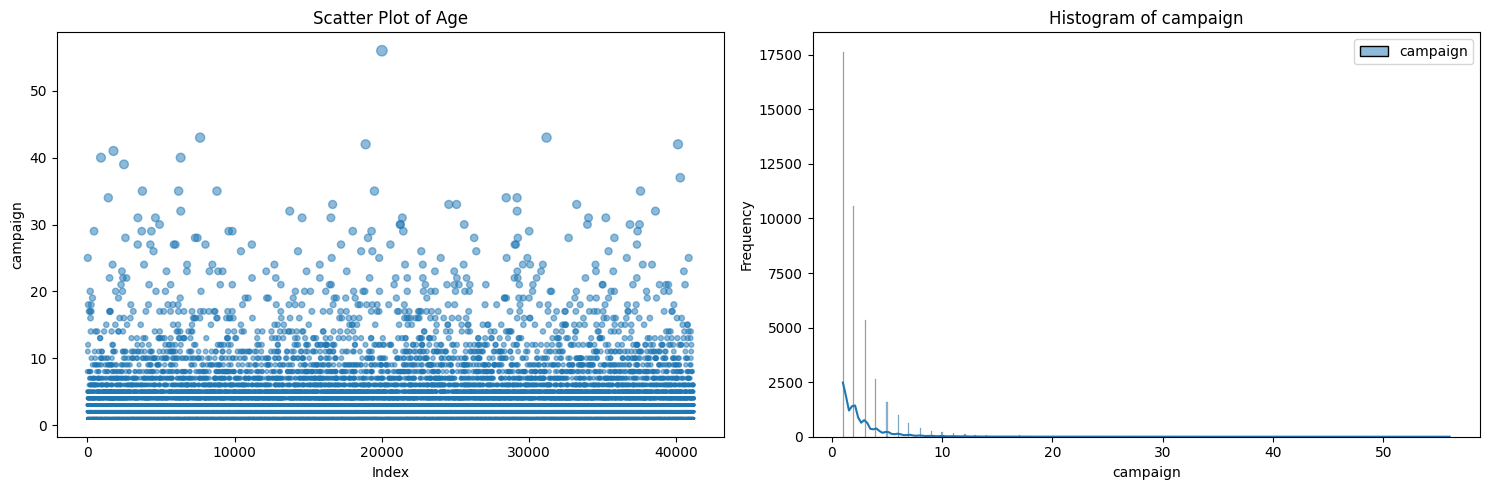

In [ ]:
plot_scatter_distribution(campaing)

# **PDAYS Column**

 **Discription:** Number of days that passed since the previous contact

In [ ]:
Pdays= ddf_copy[["pdays"]]
more_stats(Pdays)

------------------------------------------Some Stats Info-------------------------------------------
The data is  Left Skewness
Data Types of the data is pdays    int64
dtype: object
Null Values in the data --> pdays    0
dtype: int64
Outliers in the data --> 1515


In [ ]:

pdays_bins = pd.cut(ddf_copy['pdays'], bins=[-np.inf, 10, 20, 30, 999],
                   labels=['0-10', '11-20', '21-30', 'Never contacted Before']) # Adjusted labels to match the new bin order.

# Add the binned column to the DataFrame
ddf_copy['pdays_bins'] = pdays_bins

In [ ]:
px.bar(ddf_copy, x=ddf_copy['pdays_bins'].value_counts().index,
       y=ddf_copy['pdays_bins'].value_counts().values,title= "Pdays Value Counts")

In [ ]:
ddf_copy[['pdays_bins', "pdays"]].head()

,pdays_bins,pdays
0,Never contacted Before,999
1,Never contacted Before,999
2,0-10,6
3,Never contacted Before,999
4,0-10,3


# **PREVIOUS Columns**

**Discription:**  Number of contacts performed before this campaign for the same client

In [ ]:
previous= ddf_copy[["previous"]]
more_stats(previous)

------------------------------------------Some Stats Info-------------------------------------------
The data is Right Skewness
Data Types of the data is previous    int64
dtype: object
Null Values in the data --> previous    0
dtype: int64
Outliers in the data --> 5625


In [ ]:

bins = [ 0,1, 4, 6, np.inf]
labels = ['New Client', '1-3', '4-6', "6+"]
ddf_copy['previous_bins'] = pd.cut(ddf_copy['previous'], bins=bins, labels=labels, right=False)


In [ ]:
ddf_copy[['previous_bins',"previous"]].head()

,previous_bins,previous
0,New Client,0
1,New Client,0
2,1-3,2
3,New Client,0
4,1-3,1


# **emp_var_rate Column**

**Discription:**  The emp_var_rate is often called as the percentage change in the number of employed individuals over a specific period

In [ ]:
more_stats(ddf_copy[["emp_var_rate"]])


------------------------------------------Some Stats Info-------------------------------------------
The data is  Left Skewness
Data Types of the data is emp_var_rate    float64
dtype: object
Null Values in the data --> emp_var_rate    0
dtype: int64
Outliers in the data --> 0


In [ ]:


emp_bins = pd.cut(ddf_copy['emp_var_rate'], bins=[-np.inf, -3, -1, 1, np.inf],
                   labels=['High Negative Change', 'Moderate Negative Change', 'Positive Change', 'High Positive Change'])

# Add the binned column to the DataFrame
ddf_copy['emp_var_rate_bins'] = emp_bins


In [ ]:
ddf_copy[['emp_var_rate_bins','emp_var_rate']].head()

,emp_var_rate_bins,emp_var_rate
0,High Positive Change,1.4
1,Positive Change,-0.1
2,Moderate Negative Change,-1.7
3,Moderate Negative Change,-1.8
4,Moderate Negative Change,-2.9


# **cons_price_idx Column**

**Discription:** he CPI is the change in the cost of this basket over time, typically compared to a base year.

In [ ]:
more_stats(ddf_copy[["cons_price_idx"]])

------------------------------------------Some Stats Info-------------------------------------------
The data is Roughly Skewed
Data Types of the data is cons_price_idx    float64
dtype: object
Null Values in the data --> cons_price_idx    0
dtype: int64
Outliers in the data --> 0


In [ ]:

cons_price_bins = pd.cut(ddf_copy['cons_price_idx'], bins=[92, 93, 94, 95, 96],
                       labels=['92-93', '93-94', '94-95', '95-96'])

# Add the binned column to the DataFrame
ddf_copy['cons_price_idx_bins'] = cons_price_bins

ddf_copy[['cons_price_idx_bins','cons_price_idx']].head()


,cons_price_idx_bins,cons_price_idx
0,93-94,93.444
1,93-94,93.200
2,94-95,94.055
3,93-94,93.075
4,92-93,92.201


# **cons_conf_idx Column**

**Discroption:** he index is based on responses to questions about future economic prospects, job security, and purchasing intentions.

In [ ]:
more_stats(ddf_copy[["cons_conf_idx"]])

------------------------------------------Some Stats Info-------------------------------------------
The data is Roughly Skewed
Data Types of the data is cons_conf_idx    float64
dtype: object
Null Values in the data --> cons_conf_idx    0
dtype: int64
Outliers in the data --> 447


In [ ]:
values= ddf_copy['cons_conf_idx'].unique()
np.sort(values)

array([-50.8, -50. , -49.5, -47.1, -46.2, -45.9, -42.7, -42. , -41.8,
       -40.8, -40.4, -40.3, -40. , -39.8, -38.3, -37.5, -36.4, -36.1,
       -34.8, -34.6, -33.6, -33. , -31.4, -30.1, -29.8, -26.9])

In [ ]:


cons_conf_bins = pd.cut(ddf_copy['cons_conf_idx'], bins=[-60, -46, -40, -35, -30, -25],
                       labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Add the binned column to the DataFrame
ddf_copy['cons_conf_idx_bins'] = cons_conf_bins

ddf_copy[ddf_copy['cons_conf_idx_bins'].isna()]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,duration_bins,pdays_bins,previous_bins,emp_var_rate_bins,cons_price_idx_bins,cons_conf_idx_bins


# **euribor3m Column**

**Discription:** The Euribor 3-month rate is the average interest rate at which banks lend to each other for three-month periods.

In [ ]:
more_stats(ddf_copy[["euribor3m"]])

------------------------------------------Some Stats Info-------------------------------------------
The data is  Left Skewness
Data Types of the data is euribor3m    float64
dtype: object
Null Values in the data --> euribor3m    0
dtype: int64
Outliers in the data --> 0


# **nr_employed Column**

**Columns Discription:** Total number of employed individuals in the country

In [ ]:
more_stats(ddf_copy[["nr_employed"]])

------------------------------------------Some Stats Info-------------------------------------------
The data is  Left Skewness
Data Types of the data is nr_employed    float64
dtype: object
Null Values in the data --> nr_employed    0
dtype: int64
Outliers in the data --> 0


In [ ]:

nr_employed_bins = pd.cut(ddf_copy['nr_employed'], bins=[4900, 5000, 5100, 5200, 5300],
                       labels=['Low', 'Moderate', 'High', 'Very High'])

# Add the binned column to the DataFrame
ddf_copy['nr_employed_bins'] = nr_employed_bins

ddf_copy[['nr_employed_bins','nr_employed']].tail()


,nr_employed_bins,nr_employed
41191,Very High,5228.1
41194,Very High,5228.1
41196,High,5191.0
41197,Moderate,5017.5
41198,High,5191.0


# **MARITAL Column**

**Discription:** Marital Status of clients

In [ ]:
def cat_more_stats(data):
  """
  check null values in a given column ,  unique values of given column
  """
  unique= data[data.columns[0]].unique()
  null = data.isnull().sum()
  print("Some Stats Info".center(100,"-"))
  print(f"Unique Values in the data --> {unique}")
  print(f"Null Values in the data --> {null}")
cat_more_stats(ddf_copy[["marital"]])

------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['married' 'single' 'divorced' 'unknown']
Null Values in the data --> marital    0
dtype: int64


In [ ]:
px.bar(ddf_copy, x=ddf_copy['marital'].value_counts().index,
       y=ddf_copy['marital'].value_counts().values,title= "Marital Value Counts" )

# **POUTCOMES Column**

**Discription:** Prevoius Campaign Outcomes

In [ ]:
cat_more_stats(ddf_copy[["poutcome"]])

------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['nonexistent' 'success' 'failure']
Null Values in the data --> poutcome    0
dtype: int64


In [ ]:
px.bar(ddf_copy, x=ddf_copy['poutcome'].value_counts().index,y=ddf_copy['poutcome'].value_counts().values,title= "Poutcome Value Counts" )

# **JOBS Column**

In [ ]:
cat_more_stats(ddf_copy[["job"]])

------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
Null Values in the data --> job    0
dtype: int64


In [ ]:
px.bar(ddf_copy, x=ddf_copy['job'].value_counts().index,y=ddf_copy['job'].value_counts().values,title= "Job Value Counts" )

# **Education Column**

**Discription:** Education of our client

In [ ]:
cat_more_stats(ddf_copy[["education"]])

------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
Null Values in the data --> education    0
dtype: int64


In [ ]:
fig= px.line(ddf_copy, x=ddf_copy['education'].value_counts().index,y=ddf_copy['education'].value_counts().values,title= "Education Value Counts" )
fig.update_xaxes(title_text="Education")  # Update x-axis title
fig.update_yaxes(title_text="Count")   # Update y-axis title
fig.show()

# **DEFAULT Column**

**Discription:** Whether the individual has defaulted on a loan in the past

In [ ]:
cat_more_stats(ddf_copy[["default"]])

------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['unknown' 'no' 'yes']
Null Values in the data --> default    0
dtype: int64


In [ ]:
px.pie(ddf_copy, names=ddf_copy['default'].value_counts().index, values=ddf_copy['default'].value_counts().values,title= "Default Value Counts" )

# **HOUSING and LOAN Columns**

**Discription:** These are the Columns Showing if the user have house or other load on them

In [ ]:
cat_more_stats(ddf_copy[["housing"]])
cat_more_stats(ddf_copy[["loan"]])

------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['yes' 'no' 'unknown']
Null Values in the data --> housing    0
dtype: int64
------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['no' 'yes' 'unknown' 'n' 'y']
Null Values in the data --> loan    0
dtype: int64


In [ ]:

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Pie chart for housing
fig.add_trace(go.Pie(labels=ddf_copy['housing'].value_counts().index,
                     values=ddf_copy['housing'].value_counts().values,
                     name="Housing"), 1, 1)

# Pie chart for loan
fig.add_trace(go.Pie(labels=ddf_copy['loan'].value_counts().index,
                     values=ddf_copy['loan'].value_counts().values,
                     name="Loan"), 1, 2)

# Update layout
fig.update_layout(title_text="Housing and Loan Distribution")

# Display plot
fig.show()


# **CONTACT Column**

**Discription:** Communication channel used (e.g., telephone, email)

In [ ]:
cat_more_stats(ddf_copy[["contact"]])

------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['cellular' 'telephone' nan]
Null Values in the data --> contact    3
dtype: int64


In [ ]:


# # Imputing null with class unknown
# ddf_copy['contact'] = ddf_copy['contact'].fillna('unknown')
ddf_copy.dropna(subset= ['contact'], inplace= True, axis=0)


In [ ]:
ddf_copy['contact'].isnull().sum()

0

In [ ]:
px.pie(ddf_copy, names=ddf_copy['contact'].value_counts().index, values=ddf_copy['contact'].value_counts().values,title= "Contact Value Counts" )

# **MONTH and DAY_OF_WEEK Column**

**Discription:** Month and the week when contact was made

In [ ]:
cat_more_stats(ddf_copy[["month"]])
cat_more_stats(ddf_copy[["day_of_week"]])

------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
Null Values in the data --> month    0
dtype: int64
------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> ['thu' 'fri' 'tue' 'mon' 'wed']
Null Values in the data --> day_of_week    0
dtype: int64


In [ ]:

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'scatter'}, {'type':'scatter'}]])

# Scatter plot for month
fig.add_trace(go.Scatter(x=ddf_copy['month'].value_counts().index,
                         y=ddf_copy['month'].value_counts().values,
                         mode='markers',
                         name='Month'),
              row=1, col=1)

# Scatter plot for day of week
fig.add_trace(go.Scatter(x=ddf_copy['day_of_week'].value_counts().index,
                         y=ddf_copy['day_of_week'].value_counts().values,
                         mode='markers',
                         name='Day of Week'),
              row=1, col=2)

# Update layout
fig.update_layout(title_text="Month and Day of Week Distribution",
                  width=1200, height=500,
                  xaxis_title="Month", yaxis_title="Count",
                  xaxis2_title="Day of Week", yaxis2_title="Count")

# Display plot
fig.show()


# ***TARGET VARIABLE***

# **Y Columns**

In [ ]:
cat_more_stats(ddf_copy[["y"]])

------------------------------------------Some Stats Info-------------------------------------------
Unique Values in the data --> [0 1]
Null Values in the data --> y    0
dtype: int64


We are seeing that data is not normally distributed we will handle this problem during model training

In [ ]:
px.bar(
    ddf_copy,
    x=ddf_copy['y'].value_counts().index,
    y=ddf_copy['y'].value_counts().values,
    title="Target Value Counts"
)

# ***We Will  Make two csv files one will contain actual columns + bins and other csv file will be use training model and create only relavent columns***

In [ ]:
ddf_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'duration_bins',
       'pdays_bins', 'previous_bins', 'emp_var_rate_bins',
       'cons_price_idx_bins', 'cons_conf_idx_bins', 'nr_employed_bins'],
      dtype='object')

In [ ]:
ddf_copy.to_csv("final_data_.csv", index=False)

In [ ]:
ddf_for_train= ddf_copy[["age","job", "marital","education","default","housing","loan", "contact",

                         "month","day_of_week", "duration_bins","pdays_bins","cons_price_idx_bins",
                         "cons_conf_idx_bins","nr_employed_bins","emp_var_rate_bins",
                         "previous_bins","campaign", "poutcome","y"]]

ddf_for_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration_bins,pdays_bins,cons_price_idx_bins,cons_conf_idx_bins,nr_employed_bins,emp_var_rate_bins,previous_bins,campaign,poutcome,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,201-300,Never contacted Before,93-94,Moderate,Very High,High Positive Change,New Client,1,nonexistent,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,101-200,Never contacted Before,93-94,Low,High,Positive Change,New Client,1,nonexistent,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,301-400,0-10,94-95,Moderate,Low,Moderate Negative Change,1-3,3,success,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,101-200,Never contacted Before,93-94,Very Low,Moderate,Moderate Negative Change,New Client,2,nonexistent,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,101-200,0-10,92-93,High,Moderate,Moderate Negative Change,1-3,1,success,1


In [ ]:
ddf_for_train.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
ddf_for_train.to_csv("dataset for training.csv", index=False)

In [ ]:
print("Helpp")

Helpp
